# Abstract: 
 - To predict the Happiness Score based on six factors 
 - economy, production, social support , life expectancy, freedom, absence of corruption, and generosity

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [3]:
happy = pd.read_csv("world_happiness.csv")
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#initializing variable to move happiness score/target variable using pop function
df1 = happy.pop("Happiness Score")

In [6]:
# adding the happiness score to the end of the data frame
happy["Happiness Score"] = df1

In [7]:
happy.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [8]:
happy.tail()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905
157,Togo,Sub-Saharan Africa,158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2.839


In [9]:
#check the shape of the dataframe
happy.shape

(158, 12)

#### we have 158 records/rows and 12 attributes/columms

# Identify the types of problems(Regression/Classification)

In [10]:
#check the datatype for each attribute
happy.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

#### There are 12 attributed one of which is target column "happiness score". Since the target column is continuous the learning method is : Regression
 - supervised
    - Regression
#### The evaluation metrics are:
  - R2 score
  - MSE
  - RMSE
  - MAE

# EDA- Exploratory Data Analysis:

### summary statistics

In [13]:
happy.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


# descriptive statistics :  describing the results
  -  There seems to be a low standard deviation this indicates that the data points tend to be very closer to the mean
  -  Most of the min range starts with 0 
  -  Further, data analysis will indicate the results of skweness and outlier if any are present
  

#### univariate analysis

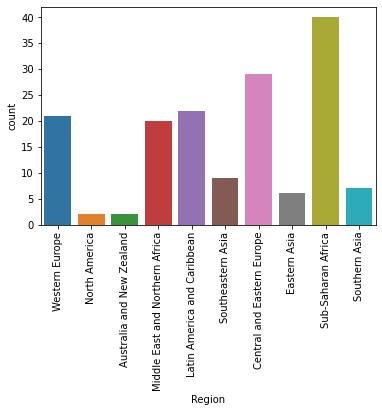

In [14]:
# plot a bar chart for Region - categorical variable
sns.countplot(x = "Region", data = happy)
plt.xticks(rotation=90)
plt.show()

This bar chart indicates the percentage of people for different  who participated in the survey
 - countries within sub-saharan african region has the highest count of partipation 

### Bi-variate analysis

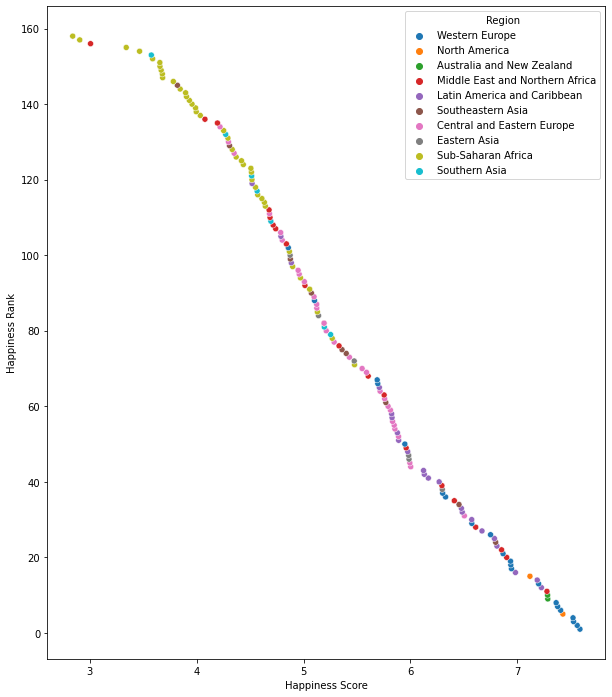

In [15]:
#Scatter plot between happiness rank and happiness score
fig, ax = plt.subplots(figsize = ( 10 , 12 )) 
sns.scatterplot(x="Happiness Score", y ="Happiness Rank", data = happy, hue = "Region" )
plt.show()

### From the scatter plot we can see a linear relationship between the happiness rank and happiness score attributes. 


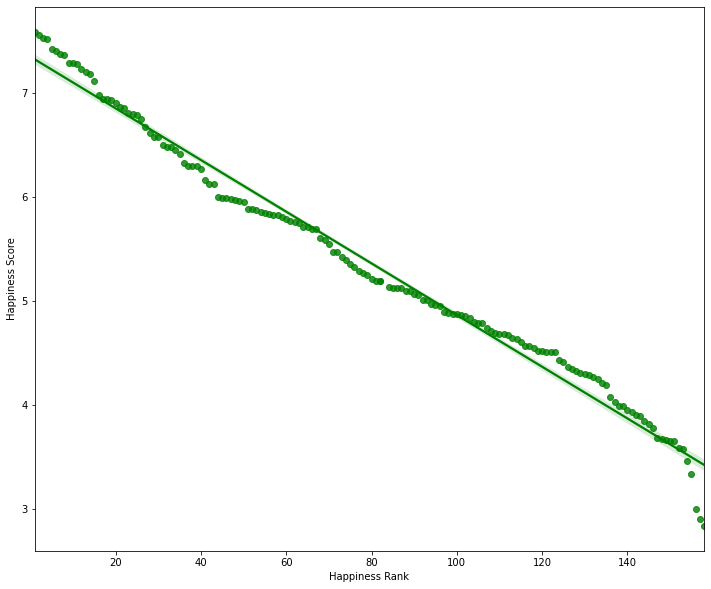

In [17]:
#Bivariate analysis 
fig, ax = plt.subplots(figsize = ( 12 , 10 )) 
sns.regplot(x="Happiness Rank", y="Happiness Score", data=happy, color ="g")

The regression plot indicates the negative linear relationship of target/happiness score with happiness rank 

In [18]:
happy.columns


Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

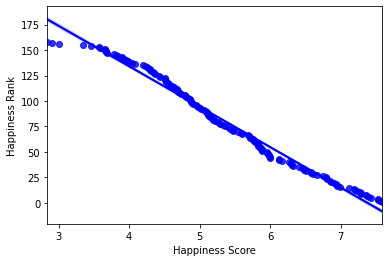

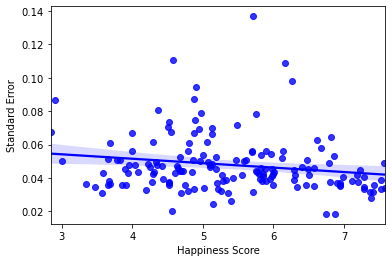

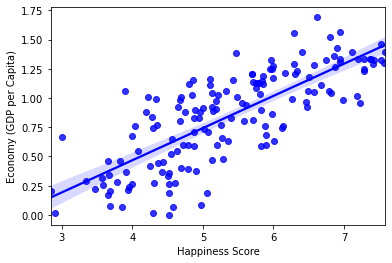

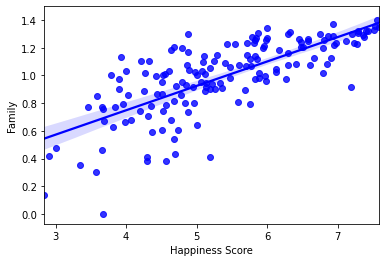

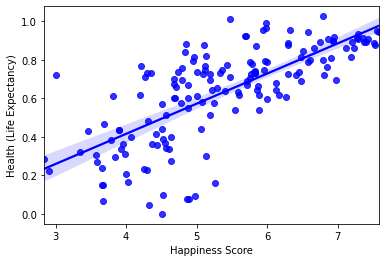

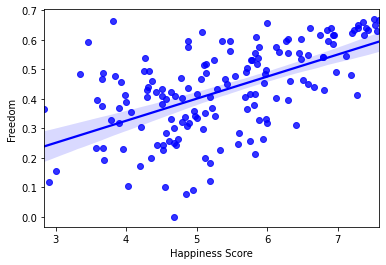

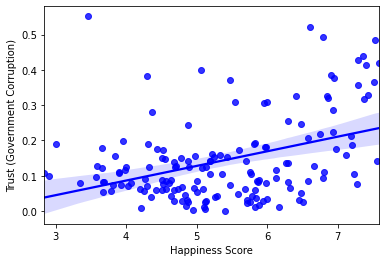

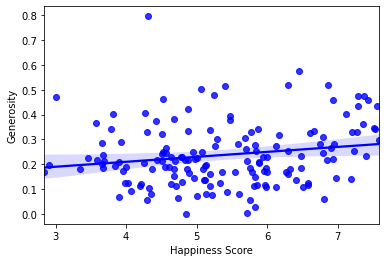

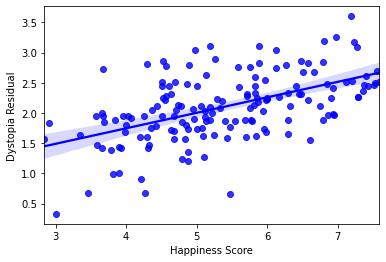

In [19]:
columns= ['Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

for values in columns:
    sns.regplot(x="Happiness Score", y=values, data=happy, color ="b")
    plt.show()
    

- Relationship of happiness score with other attribute: linear
     - happiness rank : negative linear relationship
     - Economy (GDP per Capita): positive linear relationship
     - Family: positive linear relationship
     - health: positive linear relationship 
     - Freedom: positive linear relationship
    and other 3 varibles also showcase positive linear relationship
        

### multivariate analysis

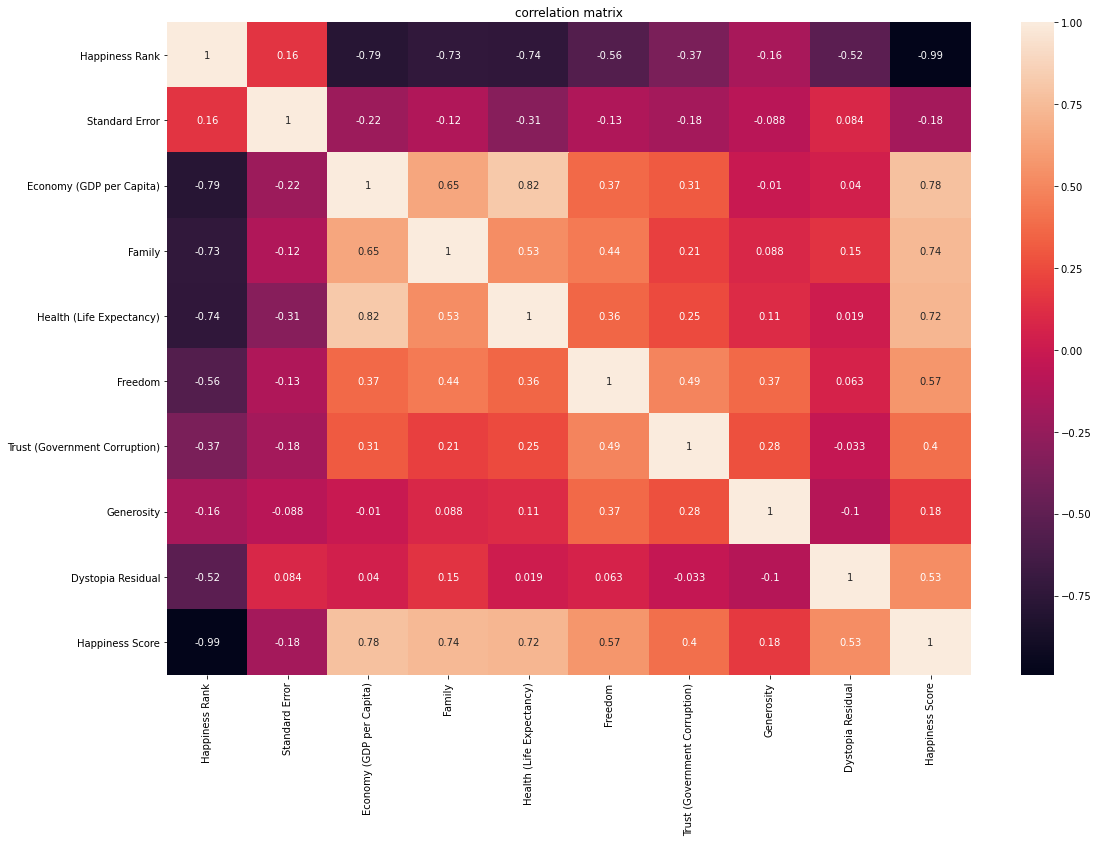

In [20]:
# plot heatmap to find the correlation
corr_mat = happy.corr()

plt.figure(figsize = [18,12])
sns.heatmap(corr_mat, annot=True)
plt.title("correlation matrix")
plt.show()

### Correlation matrix:
    - from the correlation matrix we are able to identify that the economy, family, health, freedom, trust,generosity, and Dystopia Residual are in high correlaion with target happiness score
    -  the country and region attributes are not included in the correlation matrix becuase they are categorical variables and to get a efficient model perfom transformation using label  encoder

### label encoding

In [21]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

#intialize label encoder
LE = LabelEncoder()

#change the categorical varaiables to numerical variables
happy["Country"] = LE.fit_transform(happy["Country"])
happy["Region"] = LE.fit_transform(happy["Region"])

In [22]:
happy.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [23]:
#find the correlation of class variable with other attributes
corr_matrix = happy.corr()
corr_matrix["Happiness Score"].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

There is a high correlation of happiness score with economy, family, health, freedom and dystopia

# Data Cleaning

### Treating missing values

In [25]:
happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

In [26]:
happy.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

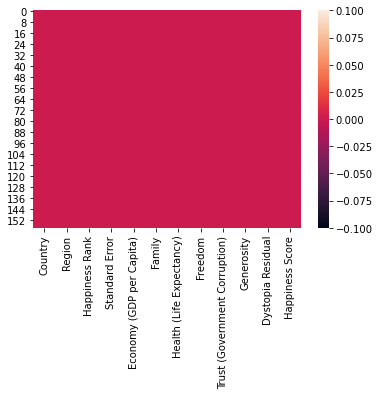

In [27]:
sns.heatmap(happy.isnull())

# Checking skewness and removal

### check the data distribution

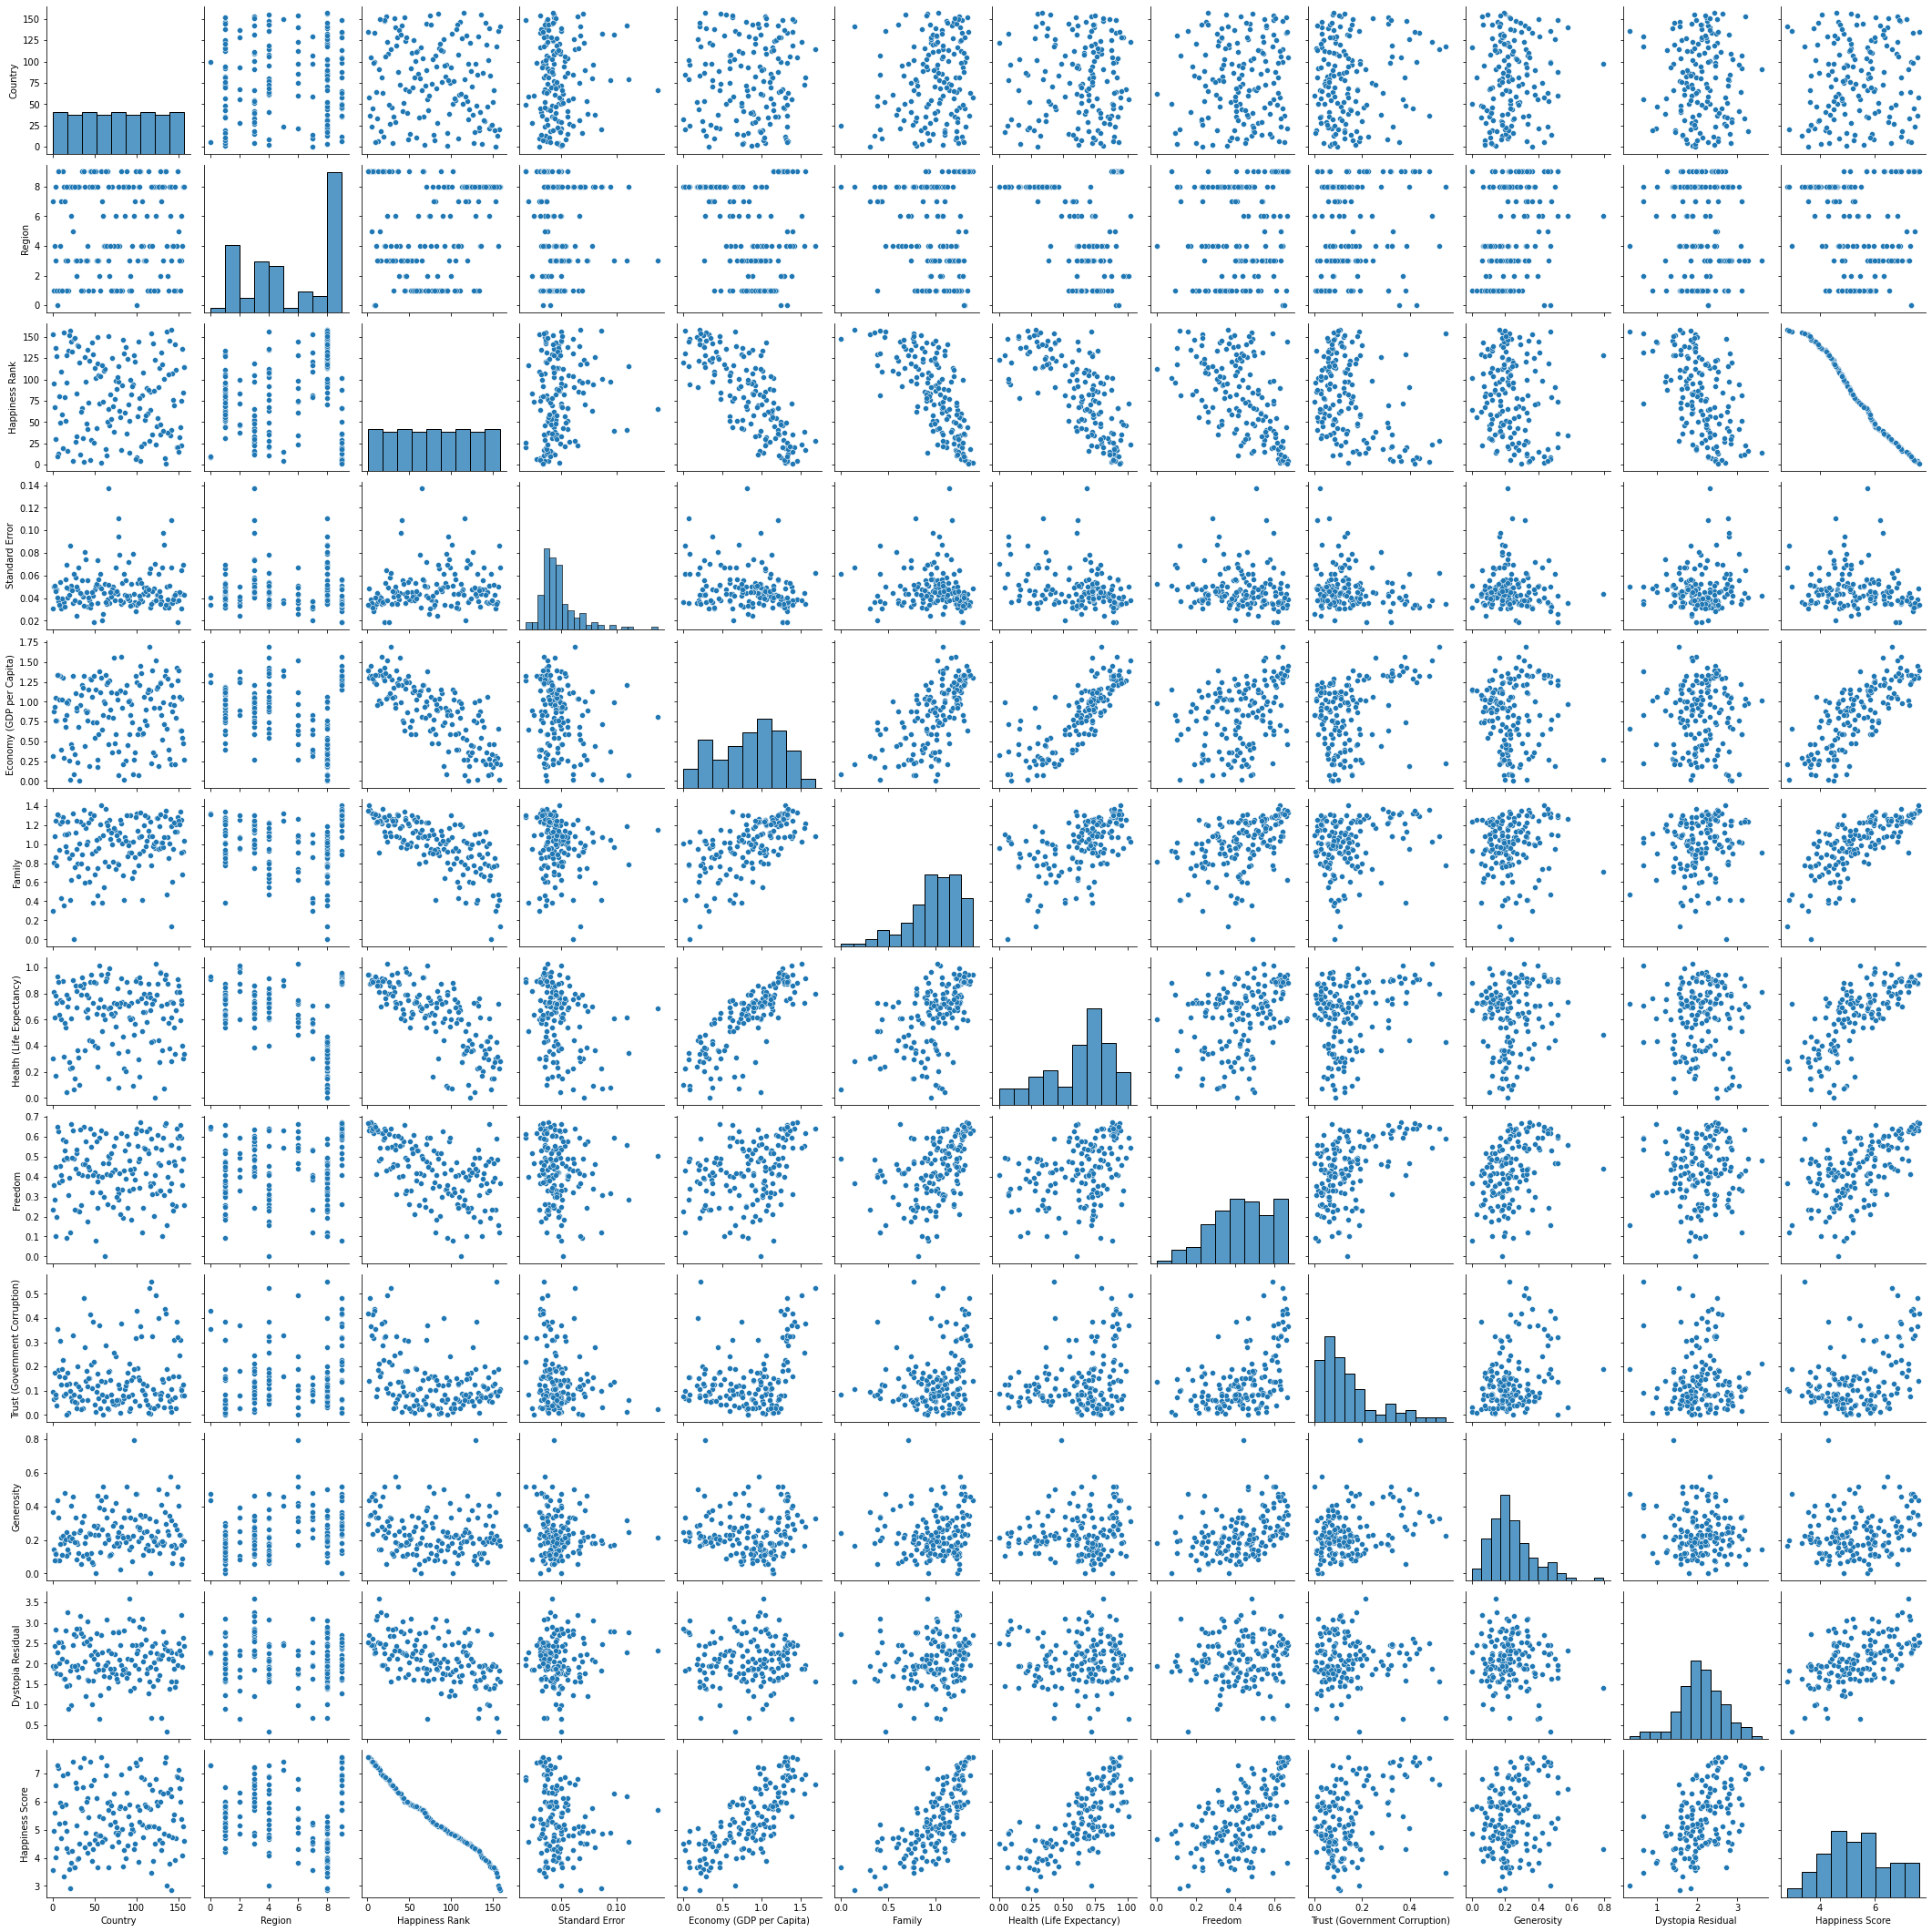

In [86]:
sns.pairplot(happy)

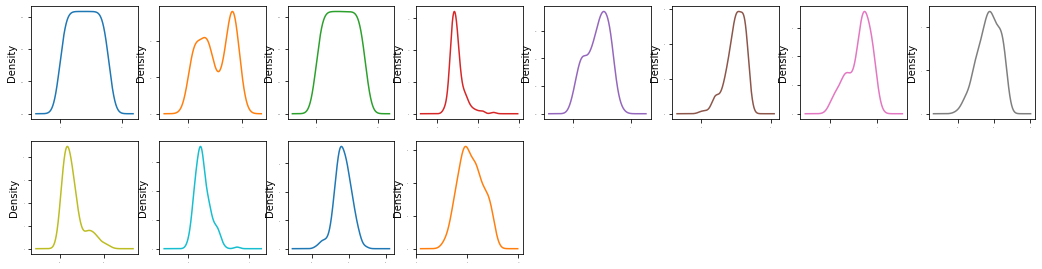

In [28]:
happy.plot(kind= "density", subplots= True, layout = (5,8), sharex=False, legend = False, fontsize =1 , figsize=(18,12))
plt.show()

- the data distribution for some attributes seems to be skewed
- to futher understand the distribution
- histograms are used

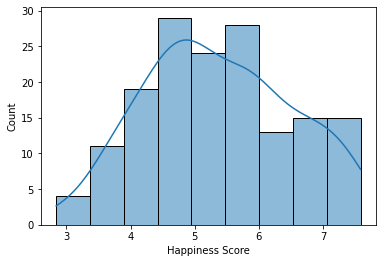

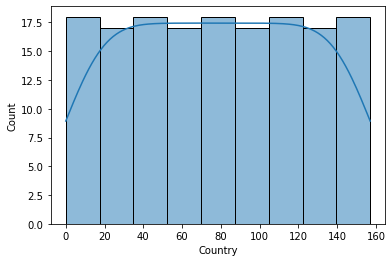

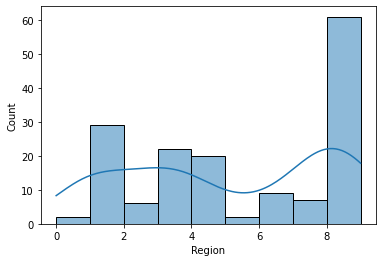

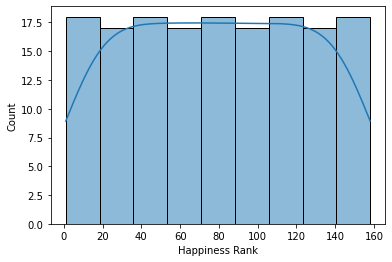

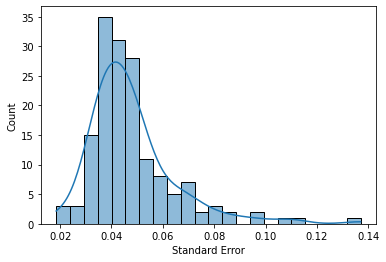

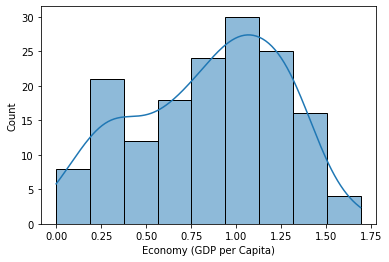

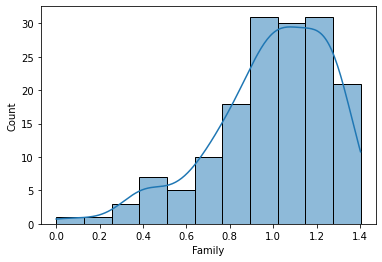

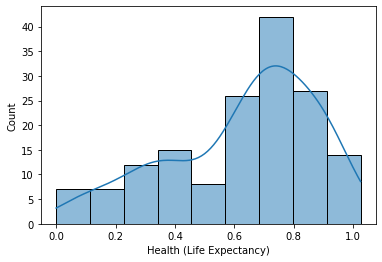

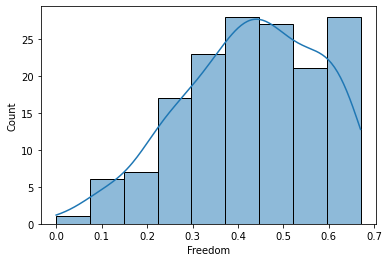

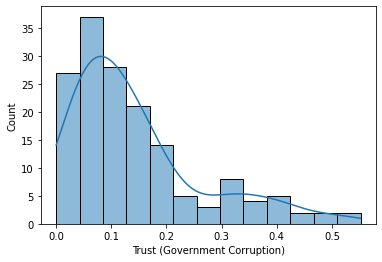

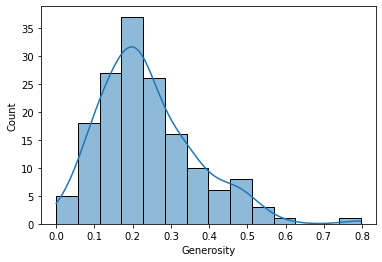

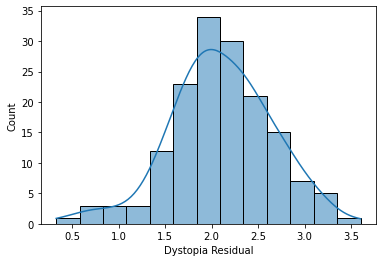

In [29]:
columns= ["Happiness Score","Country", "Region",'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
for values in columns:
    sns.histplot(data = happy, x=values, kde=True)
    plt.show()

- observation
   - Country, Region and Happiness Rank seems to scaled and normalized considring the huge fdiffernce in the range values

In [30]:
happy = happy.sample(frac=1, random_state = 0)

In [31]:
# removing  skewness using power transform
#split dataset into indepedent and dependent variable
x = happy.drop("Happiness Score", axis = 1)
y = happy["Happiness Score"]

In [32]:
#check skewness
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

- the dataset has skewness hence perform power_tranformation function to remove skewness


In [33]:
from sklearn.preprocessing import power_transform

#intialize
happy_new = power_transform(x)

#create the new dataframe
happy_new = pd.DataFrame(happy_new, columns = x.columns)

In [34]:
happy_new.skew()

Country                         -0.279791
Region                          -0.228041
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

- Skewness removed

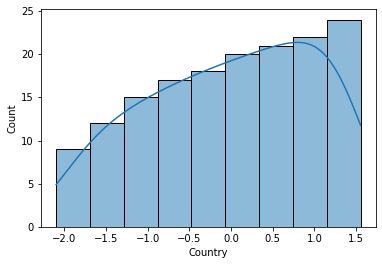

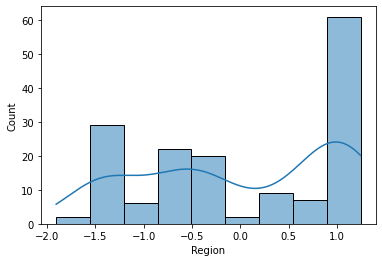

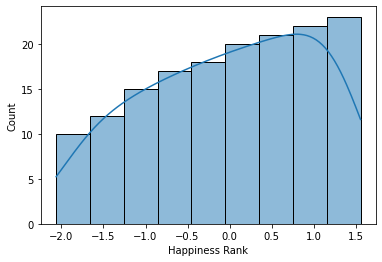

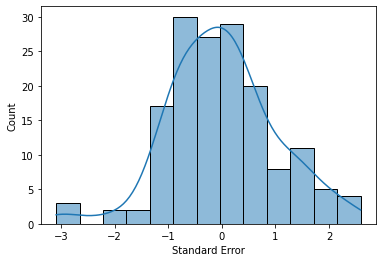

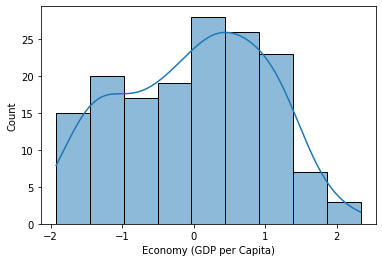

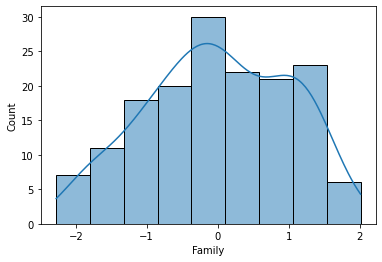

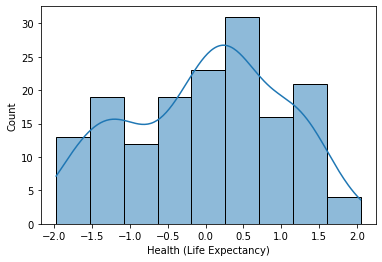

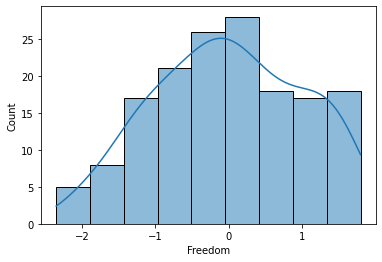

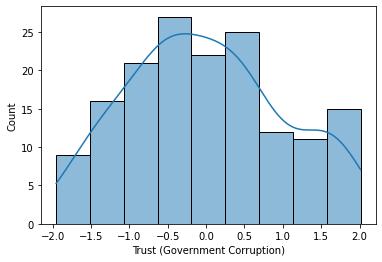

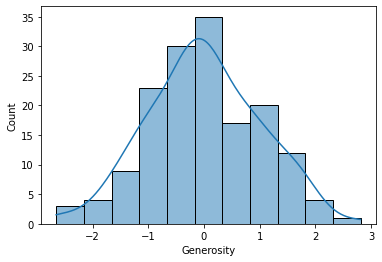

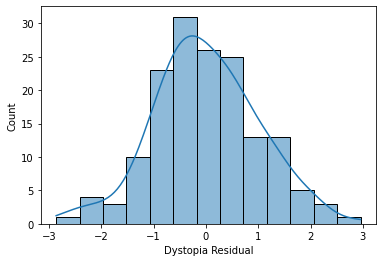

In [35]:
columns= ["Country", "Region",'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
for values in columns:
    sns.histplot(data = happy_new, x=values, kde=True)
    plt.show()

In [36]:
x = happy_new

# Checking for outlier and removal

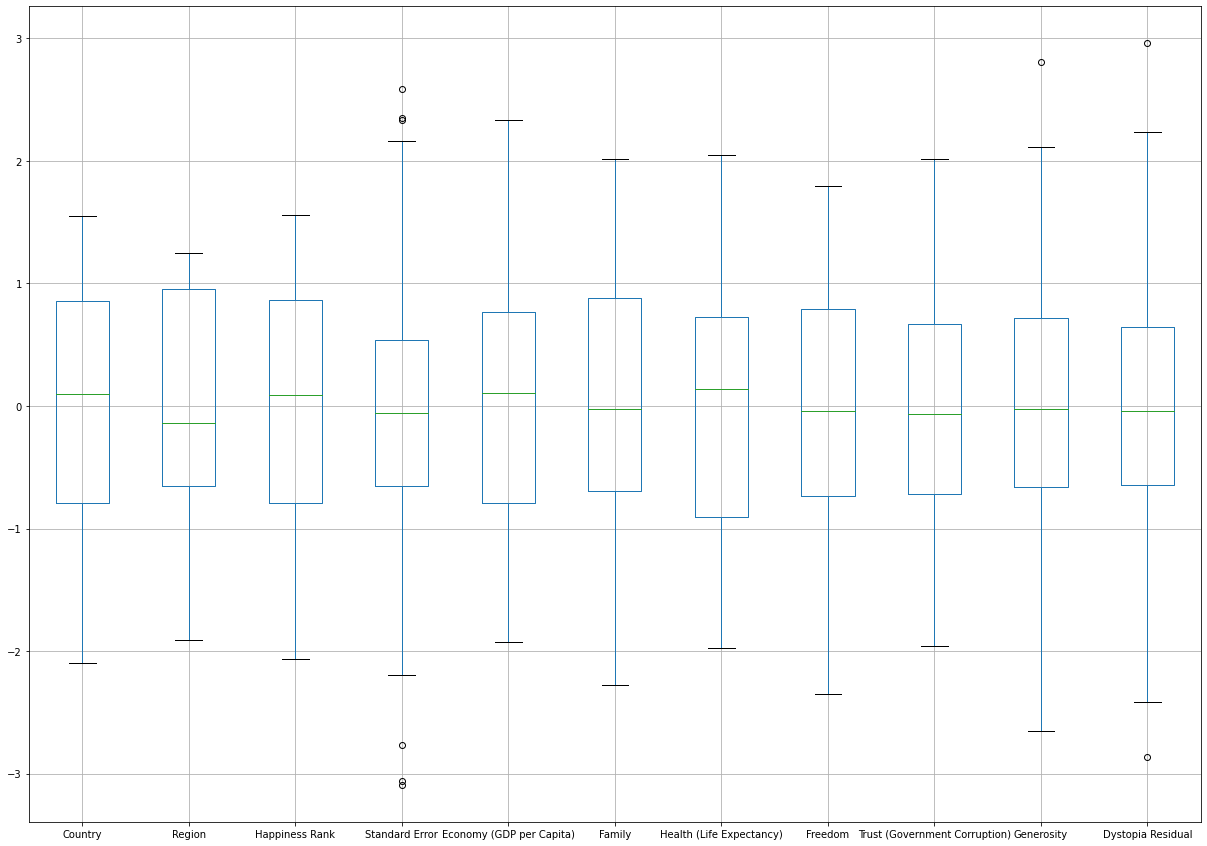

In [37]:
# plotin box plot for the attribute
x.boxplot(figsize = [21,15])
plt.show()

- Observation
   - standard error: outliers are present
   - Genorisity 
   - Dystopia Residual

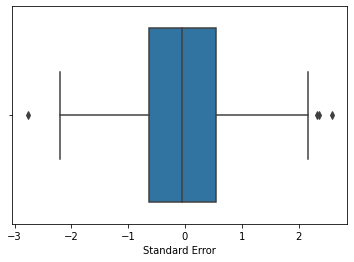

In [49]:
sns.boxplot(x = x["Standard Error"])

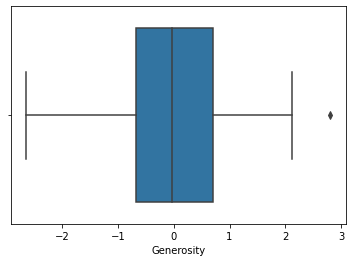

In [50]:
sns.boxplot(x = x["Generosity"])

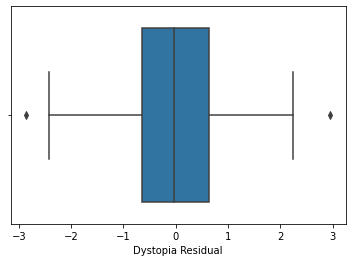

In [40]:
sns.boxplot(x = x["Dystopia Residual"])

In [41]:
# z-score to find the outlier
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(x))
print(z)

[[1.1533319  1.24453048 1.7469405  ... 1.81691406 1.06237761 0.47182996]
 [0.97383347 1.43819828 0.67614101 ... 1.20761947 0.46904625 0.23718517]
 [0.52789734 0.95510156 0.7719585  ... 1.03307725 0.10468815 0.35483164]
 ...
 [1.9795133  0.30300992 0.15071447 ... 0.61579698 1.50660618 0.58756592]
 [1.09989328 0.95510156 0.84668914 ... 0.36746948 0.25731704 0.16675758]
 [0.7694551  0.6541434  0.6040152  ... 0.6742549  1.048721   0.79347415]]


In [42]:
#define a thershold to identify the outlier
thershold = 3
print(np.where(z>3))

(array([ 79, 141], dtype=int64), array([3, 3], dtype=int64))


In [43]:
x.shape

(158, 11)

In [44]:
print(z[20][3])
print(z[25][3])


0.7949484959835073
0.5148229548525902


In [45]:
x = x[(z<3).all(axis=1)]

In [46]:
x.shape

(156, 11)

In [47]:
y =y[(z<3).all(axis=1)]

In [51]:
y.shape

(156,)

# Separate independent variable and target variable

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state = 108)

In [53]:
x_train.shape

(126, 11)

In [54]:
y_train.shape

(126,)

In [55]:
x_test.shape

(30, 11)

In [56]:
y_test.shape

(30,)

In [57]:
# scaling

In [59]:
#scalling standardize the model thus the prediction come outwith accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)
#scaled 

In [60]:
## finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9980320103999188  on Random State  197


The best random state is 197

# Finding the best algorithm:

In [61]:
# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 30, random_state = 197)
LR = LinearRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(r2_score(y_test, predlr))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predlr))
print("Mean squared error: ", mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predlr)))






0.9980320103999188
error
Mean absolute error:  0.044598729649492075
Mean squared error:  0.0028736886795319343
Root Mean Squared Error:  0.05360679695273664


In [62]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr = DTR.predict(x_test)
print(r2_score(y_test,preddtr))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

0.9931192113995001
error
Mean absolute error:  0.07796666666666638
Mean squared error:  0.010047433333333305
Root Mean Squared Error:  0.10023688609156464


In [63]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

0.9989526567664077
error
Mean absolute error:  0.03067166666666649
Mean squared error:  0.0015293466966666816
Root Mean Squared Error:  0.039106862526501425


In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

ada_reg = AdaBoostRegressor(n_estimators = 100)
print(ada_reg)
ada_reg.fit(x_train,y_train)
predada = ada_reg.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predada))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predada))
print("Mean squared error: ", mean_squared_error(y_test,predada))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predada)))

AdaBoostRegressor(n_estimators=100)
0.9988219058437352
error
Mean absolute error:  0.03440029442791411
Mean squared error:  0.0017202712047569328
Root Mean Squared Error:  0.04147615224146199


In [65]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 5)
knnr.fit(x_train, y_train)
predknnr = knnr.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predknnr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predknnr))
print("Mean squared error: ", mean_squared_error(y_test,predknnr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predknnr)))

0.9508718948561866
error
Mean absolute error:  0.20896666666666663
Mean squared error:  0.07173761466666666
Root Mean Squared Error:  0.2678387848439181


The highest accuracy score belongs to adaboostregressor and Linear regression. 100%. This may be a result of overfitting. Consider the cross validation score to find better performance

In [71]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())

the cross validation score of Linear regression model : 0.9918715400748456


In [72]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(DTR, x, y, cv = 5)
print("the cross validation score of Decision Tree regression model :", scr.mean())

the cross validation score of Decision Tree regression model : 0.9916991615932329


In [73]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(RFR, x, y, cv = 5)
print("the cross validation score of Random Forest regression model :", scr.mean())

the cross validation score of Random Forest regression model : 0.995933340514274


In [74]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(ada_reg, x, y, cv = 5)
print("the cross validation score of AdaBoost regressoin model :", scr.mean())

the cross validation score of AdaBoost regressoin model : 0.9954364216487569


In [75]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(knnr, x, y, cv = 5)
print("the cross validation score of Knearestneighbour regression model :", scr.mean())

the cross validation score of Knearestneighbour regression model : 0.8924166090662174


After calculating the difference between actual accuracy score an cross validation score. the decision tree classifier has the best accuracy

# Hyper Parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV


In [77]:
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["mse", "mae"]
    
}

In [78]:
GCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)

In [79]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [80]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'criterion': 'mae', 'max_depth': 5}

In [81]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [82]:
r2_score(y_test, GCV_pred)

0.9944932153277379

# save the model

In [84]:
import joblib
joblib.dump(GCV.best_estimator_, "HappyDTR.pkl")

['HappyDTR.pkl']

In [85]:
import pickle

filename = 'HappyDTR.pkl'
pickle.dump(DTR,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([3.995, 3.681, 5.212, 7.286, 3.655, 6.269, 5.96 , 5.192, 3.956,
       6.505, 5.96 , 5.828, 4.571, 5.098, 4.571, 6.786, 4.857, 7.119,
       3.989, 6.485, 3.956, 7.284, 4.517, 4.419, 5.754, 6.269, 7.527,
       7.527, 5.828, 4.786])